In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import time
import matplotlib.pyplot as plt
import os

In [2]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.3444, 0.3809, 0.4082], std=[0.1809, 0.1331, 0.1137])
])

In [3]:
dataset = datasets.EuroSAT(root='./data', transform=transform, download=True)

In [4]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import torch

# Suppose your dataset is a list-like object returning (x, y)
targets = [dataset[i][1] for i in range(len(dataset))]  # get labels

train_indices, test_indices = train_test_split(
    list(range(len(dataset))),
    test_size=0.2,
    stratify=targets,
    random_state=42
)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

In [5]:
import pickle

# Save the indices
with open('datasplit/split_indices.pkl', 'wb') as f:
    pickle.dump({'train': train_indices, 'test': test_indices}, f)

# Later, load them
#with open('datasplit/split_indices.pkl', 'rb') as f:
#    split = pickle.load(f)
#    train_dataset = Subset(dataset, split['train'])
#    test_dataset = Subset(dataset, split['test'])

In [6]:
# visualize the target distribution of train and test datasets
import matplotlib.pyplot as plt
def plot_target_distribution(dataset, title):
    targets = [dataset[i][1] for i in range(len(dataset))]
    plt.figure(figsize=(10, 5))
    plt.hist(targets, bins=range(max(targets) + 2), align='left', rwidth=0.8)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(range(max(targets) + 1))
    plt.show()

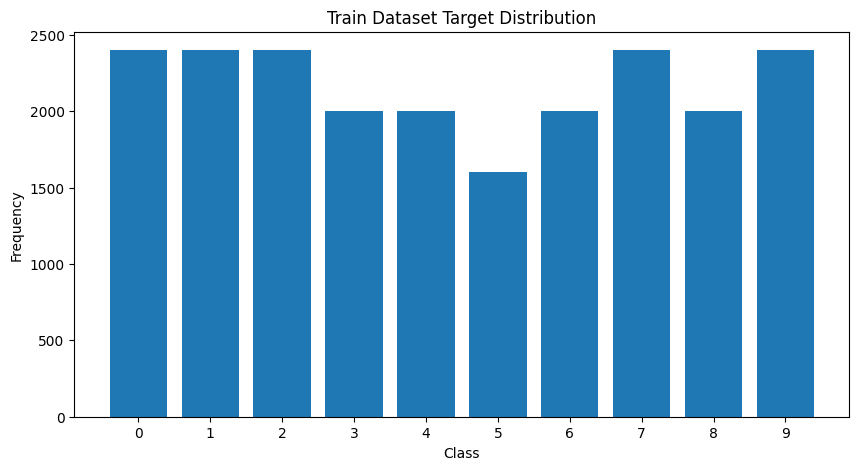

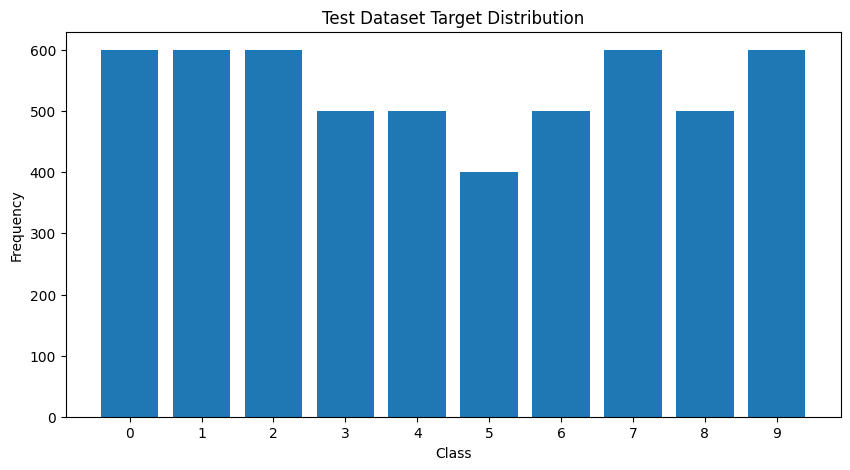

In [7]:
plot_target_distribution(train_dataset, 'Train Dataset Target Distribution')
plot_target_distribution(test_dataset, 'Test Dataset Target Distribution')